<a href="https://colab.research.google.com/github/margaretmz/selfie2anime-e2e-tutorial/blob/master/Retraining_Fairfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Thu Jun 25 16:35:58 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
print(tf.__version__)

1.15.2


### Fairfaces dataset

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86" -O fairface-img-margin025-trainval.zip && rm -rf /tmp/cookies.txt

--2020-06-25 16:36:11--  https://docs.google.com/uc?export=download&confirm=uvTH&id=1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86
Resolving docs.google.com (docs.google.com)... 108.177.111.102, 108.177.111.138, 108.177.111.113, ...
Connecting to docs.google.com (docs.google.com)|108.177.111.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-44-docs.googleusercontent.com/docs/securesc/jers9n5hblft7tchc7skr5ap0ioic9bq/vnclf26sc55v0pub8huumvo9fd8ap38c/1593102900000/03161587497725415728/00424035155371049218Z/1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86?e=download [following]
--2020-06-25 16:36:11--  https://doc-0s-44-docs.googleusercontent.com/docs/securesc/jers9n5hblft7tchc7skr5ap0ioic9bq/vnclf26sc55v0pub8huumvo9fd8ap38c/1593102900000/03161587497725415728/00424035155371049218Z/1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86?e=download
Resolving doc-0s-44-docs.googleusercontent.com (doc-0s-44-docs.googleusercontent.com)... 172.217.212.132, 2607:f8b0:4001:c03::84
Conne

In [ ]:
!unzip -q fairface-img-margin025-trainval.zip

### Selfie2Anime dataset

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xOWj1UVgp6NKMT3HbPhBbtq2A4EDkghF' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1xOWj1UVgp6NKMT3HbPhBbtq2A4EDkghF" -O selfie2anime.zip && rm -rf /tmp/cookies.txt

--2020-06-25 16:36:41--  https://docs.google.com/uc?export=download&confirm=wrXD&id=1xOWj1UVgp6NKMT3HbPhBbtq2A4EDkghF
Resolving docs.google.com (docs.google.com)... 108.177.111.102, 108.177.111.139, 108.177.111.100, ...
Connecting to docs.google.com (docs.google.com)|108.177.111.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-bo-docs.googleusercontent.com/docs/securesc/411qa4g4tdlvt7602v3qqn8dk58sq2p8/8v0r9mlp4kpe53tve0grauekhf9l52g6/1593102975000/07883268761297596834/00043245050220984211Z/1xOWj1UVgp6NKMT3HbPhBbtq2A4EDkghF?e=download [following]
--2020-06-25 16:36:41--  https://doc-14-bo-docs.googleusercontent.com/docs/securesc/411qa4g4tdlvt7602v3qqn8dk58sq2p8/8v0r9mlp4kpe53tve0grauekhf9l52g6/1593102975000/07883268761297596834/00043245050220984211Z/1xOWj1UVgp6NKMT3HbPhBbtq2A4EDkghF?e=download
Resolving doc-14-bo-docs.googleusercontent.com (doc-14-bo-docs.googleusercontent.com)... 172.217.212.132, 2607:f8b0:4001:c03::84
Conne

In [ ]:
!unzip -q selfie2anime.zip

## Preparing the new dataset for UGATIT

In [ ]:
from imutils import paths

train_images = list(paths.list_images('train'))
validation_images = list(paths.list_images('val'))
train_images[:5], validation_images[:5]

(['train/59712.jpg',
  'train/82500.jpg',
  'train/83325.jpg',
  'train/74525.jpg',
  'train/69129.jpg'],
 ['val/3757.jpg',
  'val/9072.jpg',
  'val/10635.jpg',
  'val/174.jpg',
  'val/3695.jpg'])

In [ ]:
domainB_images_train = list(paths.list_images('trainB'))
domainB_images_test = list(paths.list_images('testB'))
domainB_images_train[:5], domainB_images_test[:5]

(['trainB/0807.jpg',
  'trainB/2856.jpg',
  'trainB/1977.jpg',
  'trainB/1605.jpg',
  'trainB/2977.jpg'],
 ['testB/0031.jpg',
  'testB/0030.jpg',
  'testB/0092.jpg',
  'testB/0049.jpg',
  'testB/0037.jpg'])

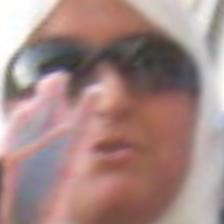

In [ ]:
from PIL import Image

Image.open(train_images[0])

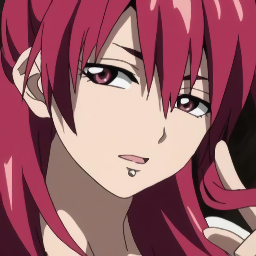

In [ ]:
Image.open(domainB_images_train[0])

UGATIT needs the dataset to be present in the following format ([reference](https://github.com/taki0112/UGATIT/#usage)):

```
├── dataset
   └── YOUR_DATASET_NAME
       ├── trainA
           ├── xxx.jpg (name, format doesn't matter)
           ├── yyy.png
           └── ...
       ├── trainB
           ├── zzz.jpg
           ├── www.png
           └── ...
       ├── testA
           ├── aaa.jpg 
           ├── bbb.png
           └── ...
       └── testB
           ├── ccc.jpg 
           ├── ddd.png
           └── ...
```

In [ ]:
print(len(train_images), len(validation_images))

86744 10954


In [ ]:
len(domainB_images_train), len(domainB_images_test)

(3400, 100)

Going with 10000 train and 5000 test images

In [ ]:
!mkdir fairfaces
!mkdir fairfaces/trainA
!mkdir fairfaces/trainB
!mkdir fairfaces/testA
!mkdir fairfaces/testB

In [ ]:
from tqdm.notebook import tqdm
import numpy as np
import shutil
import os

np.random.seed(666)

In [ ]:
partial_train_images = np.random.choice(train_images, 10000)
partial_validation_images = np.random.choice(validation_images, 5000)
print(len(partial_train_images), len(partial_validation_images))

10000 5000


In [ ]:
partial_train_images[0].split('/')

['train', '30995.jpg']

In [ ]:
def move_images(directory, list_image_path):
    for image_path in tqdm(list_image_path): 
        image_filename = image_path.split('/')[1]
        new_image_path = os.path.join(directory, image_filename)
        shutil.copy2(image_path, new_image_path)

    print('Total images found at {} directory: {}'.format(directory, 
                                                            len(list(paths.list_images(directory)))
    ))

In [ ]:
move_images('fairfaces/trainA', partial_train_images)
move_images('fairfaces/trainB', domainB_images_train)
move_images('fairfaces/testA', partial_validation_images)
move_images('fairfaces/testB', domainB_images_test)


Total images found at fairfaces/trainA directory: 9428



Total images found at fairfaces/trainB directory: 3400



Total images found at fairfaces/testA directory: 4002



Total images found at fairfaces/testB directory: 100


Not sure why the number of images mismatches in certain cases. Need to investigate. But the training can begin. 

In [ ]:
!apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 59 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (124 kB/s)
Selecting previously unselected package tree.
(Reading database ... 144328 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!tree --dirsfirst --filelimit 20 fairfaces

fairfaces
├── testA [4002 entries exceeds filelimit, not opening dir]
├── testB [100 entries exceeds filelimit, not opening dir]
├── trainA [9428 entries exceeds filelimit, not opening dir]
└── trainB [3400 entries exceeds filelimit, not opening dir]

4 directories, 0 files


## Model training

In [ ]:
!git clone https://github.com/taki0112/UGATIT/

Cloning into 'UGATIT'...
remote: Enumerating objects: 171, done.
remote: Total 171 (delta 0), reused 0 (delta 0), pack-reused 171
Receiving objects: 100% (171/171), 5.68 MiB | 21.21 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [ ]:
!mkdir dataset
!cp -r /content/fairfaces dataset

According to [this issue comment](https://github.com/taki0112/UGATIT/issues/15#issuecomment-519034663), the training would take:

> one v100 32GB GPU, 4 days

In [ ]:
!mv dataset UGATIT

In [ ]:
%cd UGATIT

/content/UGATIT


In [ ]:
!python main.py --dataset fairfaces

Streaming output truncated to the last 5000 lines.
2020-06-25 16:43:23.687928: I tensorflow/core/common_runtime/bfc_allocator.cc:905] InUse at 0x8055ad000 next 902 of size 1024
2020-06-25 16:43:23.687948: I tensorflow/core/common_runtime/bfc_allocator.cc:905] InUse at 0x8055ad400 next 903 of size 1024
2020-06-25 16:43:23.687969: I tensorflow/core/common_runtime/bfc_allocator.cc:905] InUse at 0x8055ad800 next 904 of size 1024
2020-06-25 16:43:23.687990: I tensorflow/core/common_runtime/bfc_allocator.cc:905] InUse at 0x8055adc00 next 905 of size 1024
2020-06-25 16:43:23.688012: I tensorflow/core/common_runtime/bfc_allocator.cc:905] InUse at 0x8055ae000 next 906 of size 1024
2020-06-25 16:43:23.688035: I tensorflow/core/common_runtime/bfc_allocator.cc:905] InUse at 0x8055ae400 next 907 of size 256
2020-06-25 16:43:23.688056: I tensorflow/core/common_runtime/bfc_allocator.cc:905] InUse at 0x8055ae500 next 908 of size 1024
2020-06-25 16:43:23.688076: I tensorflow/core/common_runtime/bfc_all